# Notes

Plotting a thin slice of TNG and coloring it by density

# Imports

In [127]:
import yt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches

from yt.visualization.fixed_resolution import FixedResolutionBuffer as FRB
from matplotlib import pyplot as plt
from matplotlib import colors

# Begin

In [2]:
#Load TNG data

TNG_data='/virgotng/universe/IllustrisTNG/TNG100-3/output/snapdir_099/snap_099.0.hdf5'
TNG_ds=yt.load(TNG_data)
TNG_ds.index


yt : [INFO     ] 2023-03-30 09:52:40,425 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2023-03-30 09:52:40,511 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2023-03-30 09:52:40,512 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-03-30 09:52:40,513 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-03-30 09:52:40,514 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2023-03-30 09:52:40,515 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-03-30 09:52:40,516 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2023-03-30 09:52:40,516 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2023-03-30 09:52:40,517 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2023-03-30 09:52:40,517 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-03-30 09:52:40,518 Parameters: hubble_consta

In [4]:
#plotting a slice
#from:
# https://yt-project.org/doc/visualizing/plots.html

fields = [("PartType0","Density"),("PartType0","SubfindDMDensity")]

slc = yt.SlicePlot(TNG_ds,'z',fields)





yt : [INFO     ] 2023-03-30 10:18:49,148 xlim = 0.000000 75000.000000
yt : [INFO     ] 2023-03-30 10:18:49,151 ylim = 0.000000 75000.000000
yt : [INFO     ] 2023-03-30 10:18:49,154 xlim = 0.000000 75000.000000
yt : [INFO     ] 2023-03-30 10:18:49,154 ylim = 0.000000 75000.000000
yt : [INFO     ] 2023-03-30 10:18:49,175 Making a fixed resolution buffer of (('PartType0', 'Density')) 800 by 800
yt : [INFO     ] 2023-03-30 10:24:40,801 Making a fixed resolution buffer of (('PartType0', 'SubfindDMDensity')) 800 by 800


In [67]:
#save slice as dataset so we don't have to continually recreate it
#note: we do have to continually recreate it as I don't know how to save slice plots
#from: https://yt-project.org/doc/analyzing/saving_data.html#saving-data
#https://yt-project.org/doc/visualizing/plots.html

slc.save()
#slc.data_source.save_as_dataset()

yt : [INFO     ] 2023-03-30 11:22:36,451 Saving plot snap_099_Slice_z_Density.png
yt : [INFO     ] 2023-03-30 11:22:36,865 Saving plot snap_099_Slice_z_SubfindDMDensity.png


['snap_099_Slice_z_Density.png', 'snap_099_Slice_z_SubfindDMDensity.png']

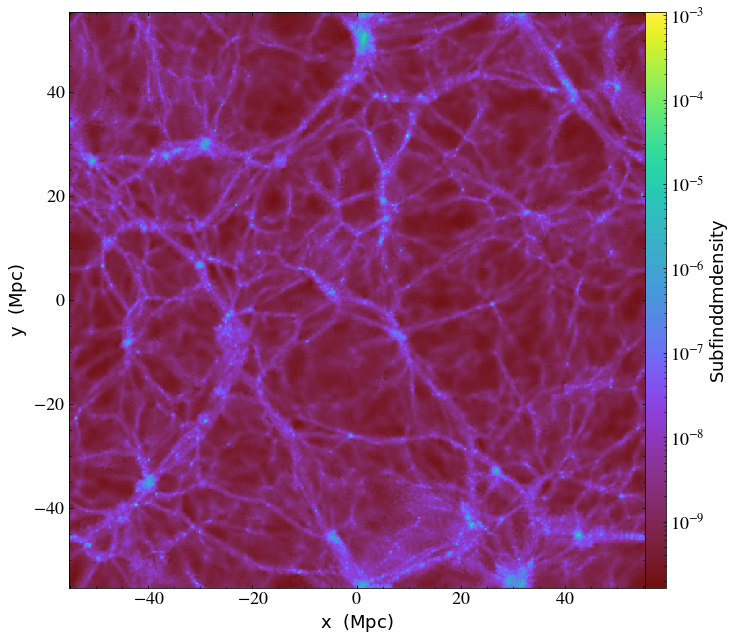

In [73]:
#show the dark matter plot
DM_fig=slc["PartType0","SubfindDMDensity"].figure
DM_fig

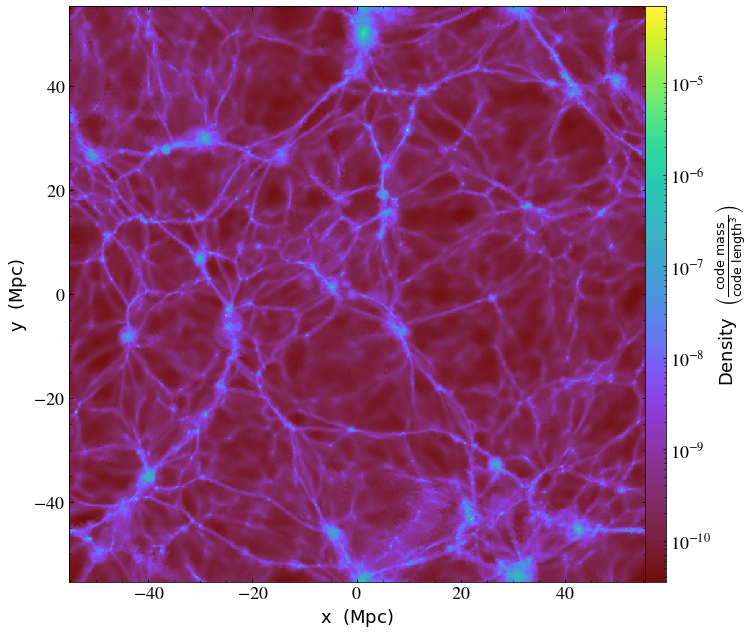

In [74]:
#show the density plot
D_fig=slc["PartType0","Density"].figure
D_fig

In [75]:
#fig?

In [77]:
#get the data from the figure
#from https://stackoverflow.com/questions/56340819/getting-xy-data-from-matplotlib-fig-object

#dark matter
DM_data = DM_fig.axes[0].images[0].get_array()

#density
D_data = D_fig.axes[0].images[0].get_array()

print(DM_data,D_data)


[[2.65149814e-10 2.72489201e-10 2.95659550e-10 ... 2.78332594e-10
  2.73149801e-10 2.67665366e-10]
 [2.57239806e-10 2.63977500e-10 2.79045470e-10 ... 2.71986361e-10
  2.64509004e-10 2.58072638e-10]
 [2.52147286e-10 2.60070997e-10 2.70418853e-10 ... 2.63116256e-10
  2.55502669e-10 2.50310187e-10]
 ...
 [3.06620212e-10 3.30037194e-10 3.78227258e-10 ... 2.85528347e-10
  2.92041439e-10 2.97421642e-10]
 [2.96497125e-10 3.17182069e-10 3.65644175e-10 ... 2.85509492e-10
  2.89014590e-10 2.91287742e-10]
 [2.80001662e-10 2.92423821e-10 3.29212961e-10 ... 2.83064517e-10
  2.82231394e-10 2.80291104e-10]] [[4.92921359e-11 4.86614049e-11 5.10199224e-11 ... 5.10214169e-11
  5.10700242e-11 5.05256553e-11]
 [4.65522266e-11 4.65604170e-11 4.85206459e-11 ... 4.89825633e-11
  4.83050500e-11 4.73797353e-11]
 [4.55170516e-11 4.63692394e-11 4.83256165e-11 ... 4.73669195e-11
  4.64775025e-11 4.56623002e-11]
 ...
 [5.94517677e-11 6.11171887e-11 6.54981669e-11 ... 5.58769140e-11
  5.75104594e-11 5.85786985e-11]

In [79]:
# get the critical density of the universe

#get the critical density of the universe
#define gravitational constant, g as in astropy

from yt.utilities.cosmology import Cosmology
co=Cosmology()

grav=TNG_ds.quan(6.6743e-11,'m**3/(kg*s**2)')
H=co.hubble_parameter(0).in_units('km/s/Mpc')
print('grav={0}'.format(grav))
print('H0 = {0}'.format(H))

#create thee critical density of the universe: note: is my inteerp of H correct?
dens_crit = ((3 * H**2)/(8*np.pi* grav))#.in_units('h**2/(code_length**3/(Msun*s**2))')
print ('critical density is: {0}'.format(dens_crit))
print('critical density in kg/m^3: {0}'.format(dens_crit.in_units('kg/m**3')))

grav=6.6743e-11 m**3/(kg*s**2)
H0 = 71.0 km/(Mpc*s)
critical density is: 9.468720094206941e-27 kg/m**3
critical density in kg/m^3: 9.468720094206941e-27 kg/m**3


In [81]:
#define units of dark matter density
units_DM = TNG_ds.quan(1e10,"(Msun/h)/((code_length)**3)")

#define units of density
units_D = TNG_ds.quan(1e10,"(Msun/h)/((code_length)**3)")

In [89]:
#put the dark matter array into our metric units
#(dark matter density / critical density)

metric_array = TNG_ds.arr(DM_data)*units/dens_crit

#create masks based on our boundaries
voimask = np.where(metric_array<0.1)
filmask = np.logical_and(metric_array>=0.1,metric_array<57)
halmask = np.where(metric_array>=57)



/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


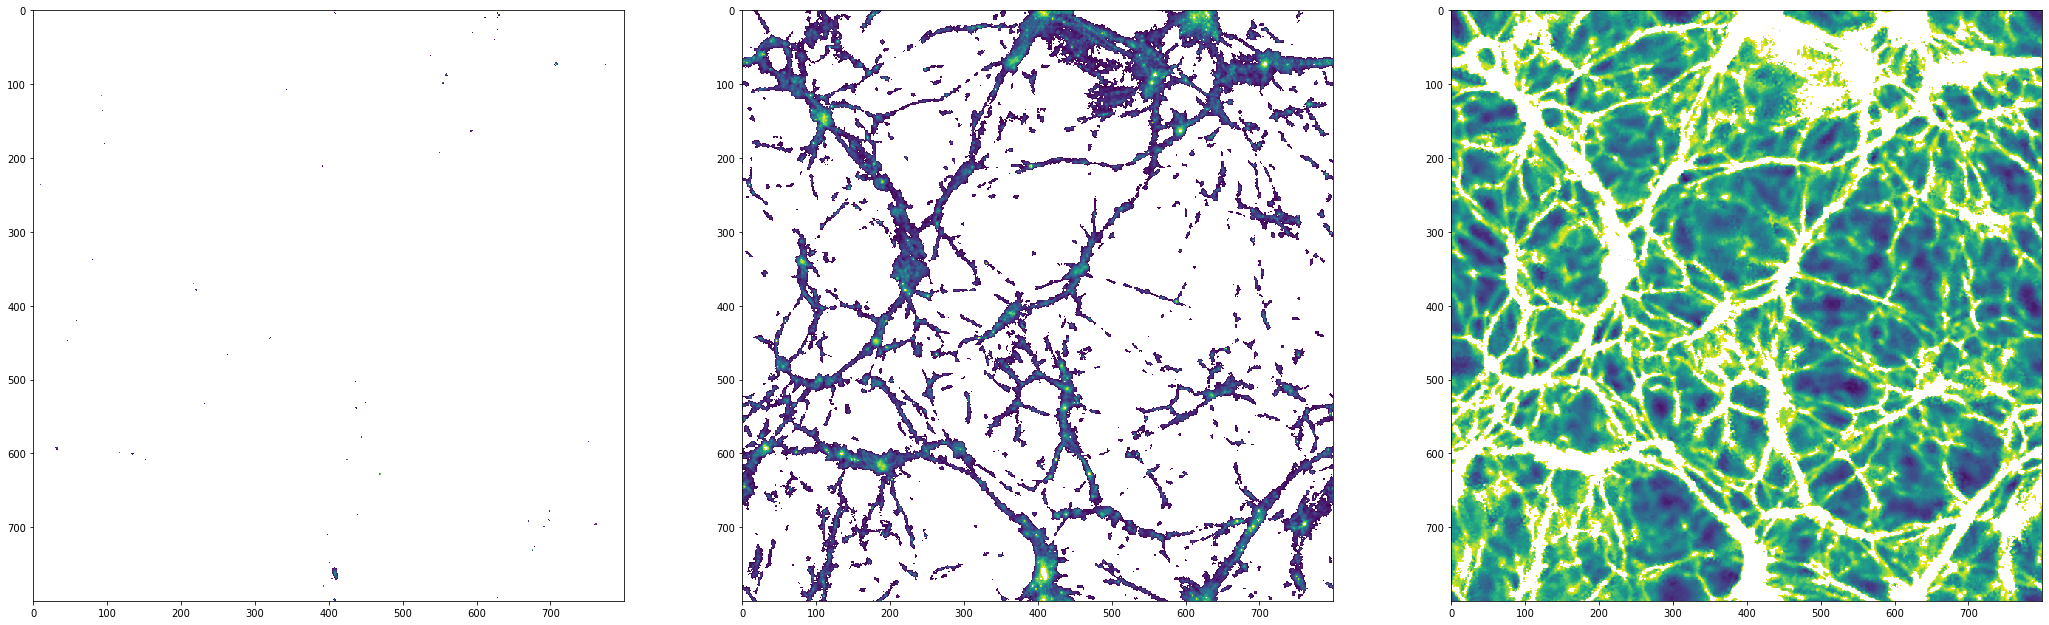

In [100]:
#plot the dark matter matter halos, filaments and voids

test=DM_data #choose which array to plot

halo_only = np.copy(test)
halo_only[voimask]=0
halo_only[filmask]=0

fila_only = np.copy(test)
fila_only[voimask]=0
fila_only[halmask]=0

void_only = np.copy(test)
void_only[filmask]=0
void_only[halmask]=0



fig = plt.figure(figsize=(36,12))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.imshow(np.log10(halo_only))
ax2.imshow(np.log10(fila_only))
ax3.imshow(np.log10(void_only))

plt.show()

/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


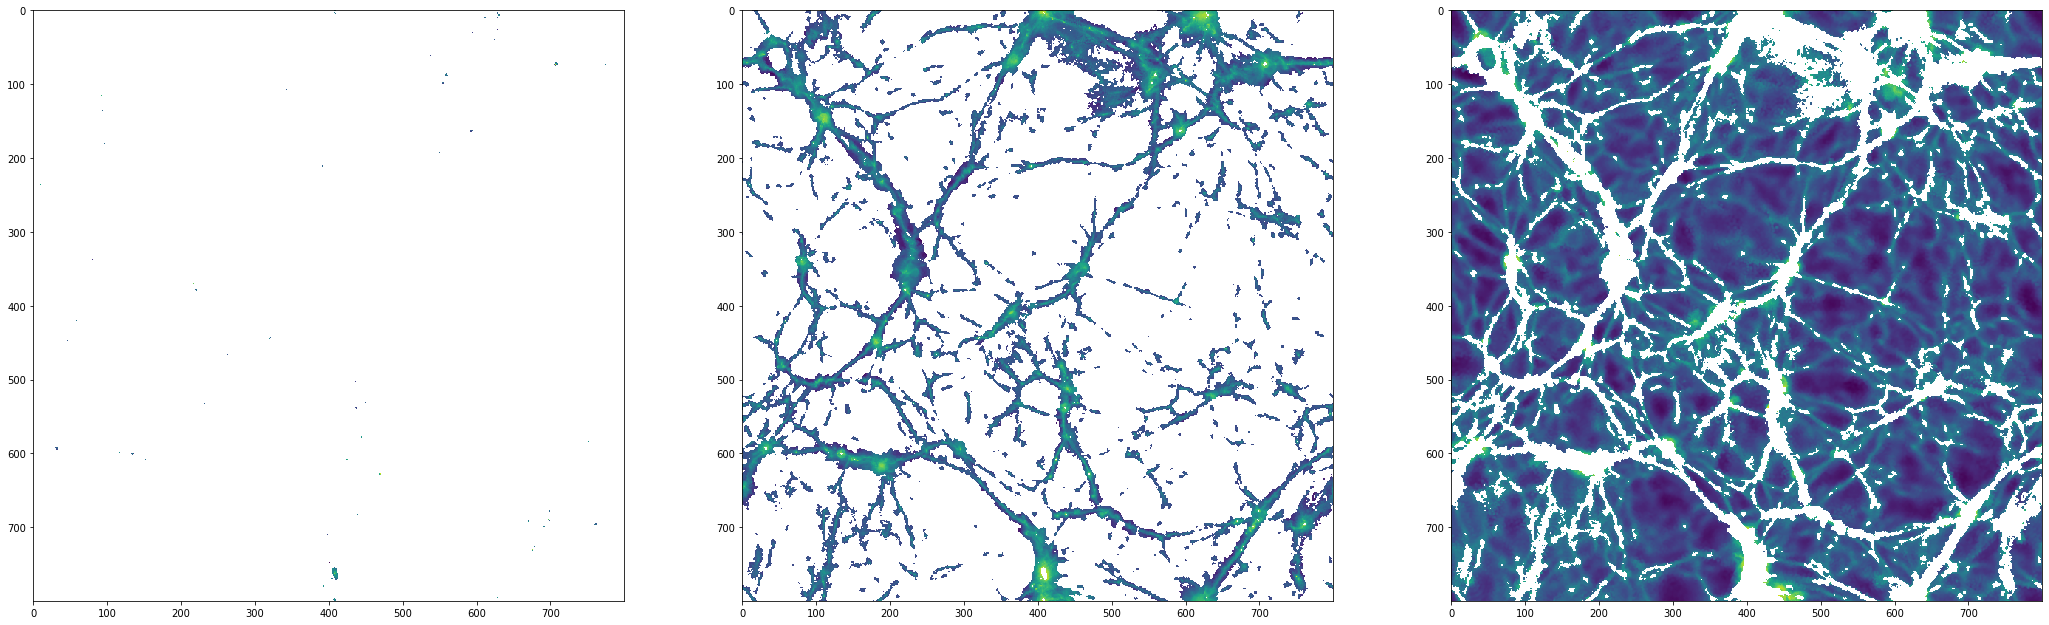

In [178]:
#plot the density halos, filaments and voids

test=D_data #choose which array to plot

halo_only = np.copy(test)
halo_only[voimask]=0
halo_only[filmask]=0

fila_only = np.copy(test)
fila_only[voimask]=0
fila_only[halmask]=0

void_only = np.copy(test)
void_only[filmask]=0
void_only[halmask]=0



fig = plt.figure(figsize=(36,12))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.imshow(np.log10(halo_only))
ax2.imshow(np.log10(fila_only))
ax3.imshow(np.log10(void_only))

plt.show()

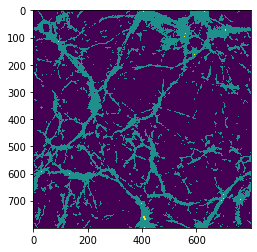

In [179]:
# create an array for block colours

blank_array = np.zeros_like(D_data)

blank_array[halmask]=2
blank_array[filmask]=1
blank_array[voimask]=0

plt.imshow(blank_array)

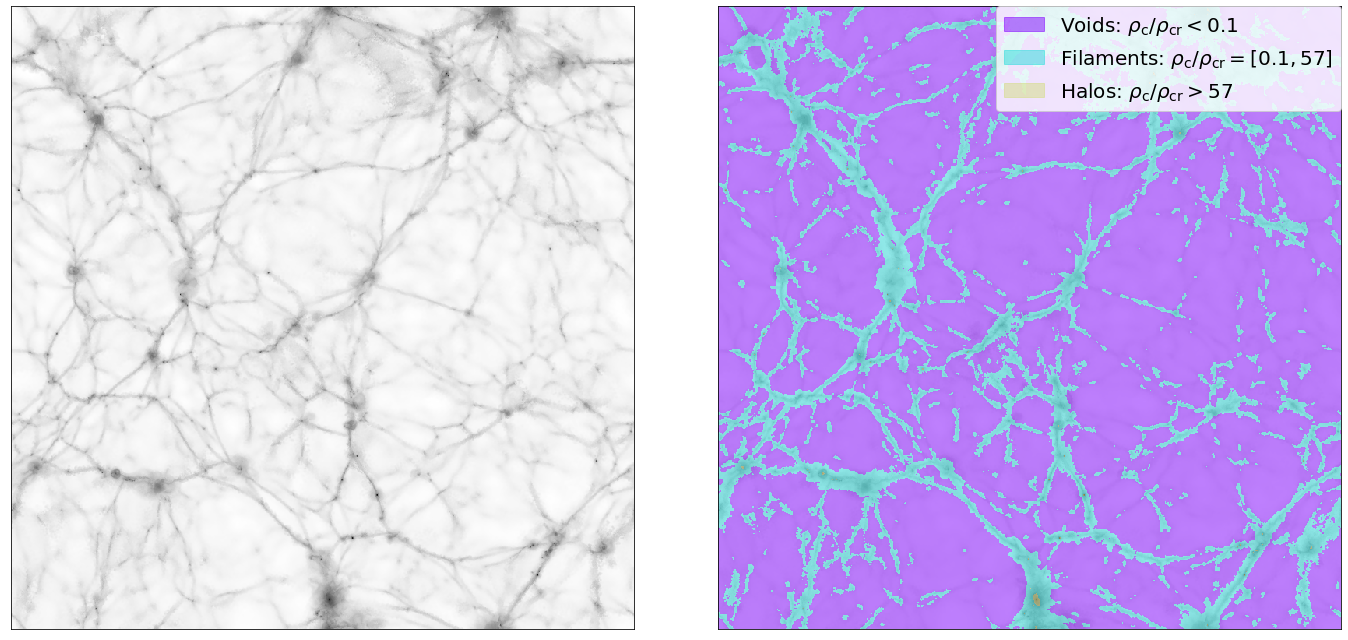

In [188]:
##### plot the slice s a function of structure
col = plt.cm.rainbow(np.linspace(0,1,4)) #create a list of colours from the colourmap which match those from plot in Paper_Plots_IF_vs_DM_3.ipynb
#cmap = colors.ListedColormap(col[0:2])
cmap = colors.ListedColormap([col[0],col[1],col[2]])
bounds=[0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(20,9))

ax1=fig.add_subplot(121)
#ax1.set_title('Density',fontsize=20)
#ax1.set_xlabel(r'$\rm{Density}$',fontsize=20)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)


im = ax1.imshow(np.log10(D_data), cmap=plt.cm.Greys)

ax2=fig.add_subplot(122)
#ax2.set_title('Density',fontsize=20)
#ax2.set_xlabel(r'$\rm{\rho_{dark}/\rho_{crit,0}}$',fontsize=20)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

im = ax2.imshow(np.log10(D_data), cmap=plt.cm.Greys,alpha=0.9)
im2 = ax2.imshow(blank_array,cmap=cmap, norm=norm,alpha=0.5)

alphaval=0.5
#colors translated from hex to rgb with:
#https://www.rapidtables.com/convert/color/hex-to-rgb.html
#and
#https://stackoverflow.com/questions/64369710/what-are-the-hex-codes-of-matplotlib-tab10-palette
print()
Halo_hex = list(matplotlib.colors.to_rgb(col[2]))
Halo_hex.append(alphaval)
Fila_hex = list(matplotlib.colors.to_rgb(col[1]))
Fila_hex.append(alphaval)
Voi_hex = list(matplotlib.colors.to_rgb(col[0]))
Voi_hex.append(alphaval)

#define labels for imshow 
#(source: https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib)
cmap = {1:Voi_hex,2:Fila_hex,3:Halo_hex}
labels = {1:r'Voids: ${\rho_{\rm c}/\rho_{\rm cr}}<0.1$',2:r'Filaments: ${\rho_{\rm c}/\rho_{\rm cr}}=[0.1,57]$',3:r'Halos: ${\rho_{\rm c}/\rho_{\rm cr}}>57$'}
patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]

ax2.legend(handles=patches, loc=1, borderaxespad=0.,fontsize=20)

plt.tight_layout()
plt.savefig('Paper_Plot_Structure_Breakdown_2.pdf',format='pdf')
plt.show()